In [1]:
from __future__ import print_function 
import numpy 
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import math
from copy import copy, deepcopy
# seed the pseudorandom number generator
from random import random
from random import seed
import pandas as pd




In [2]:
'''>>>>> start CodeP1.1F23
    V.P. Carey ME249, Fall 2023''' 
from random import seed
# seed random number generator
seed(1)

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas

#create arrays 
ydata = []
lydata = []

#Parameters for Evolution Loop
#set data parameters
ND = 77       #number of data vectors in array
DI = 5        #number of data items in vector
NS = 77       #total number of DNA strands

In [3]:
# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors 
#[heat flux, superheat, gravity, surface tension parameter, pressure] 

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])

ydata.append([59.2, 34.8, 0.098, 1.79, 5.5]) 
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5]) 
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5]) 
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5]) 
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5]) 
ydata.append([124., 43.5, 0.098, 1.79, 5.5]) 
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])

ydata.append([143.5, 46.7, 0.098, 1.79, 5.5]) 
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5]) 
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5]) 
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])  

ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])
ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])   

ydata.append([42.4, 28.0, 19.6, 1.79, 9.5]) 
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5]) 
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])

ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])  

ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])   

ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])  
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])    

ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])  
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])    

# print the data array
print ('ydata =', ydata)

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5], [47.4, 33.2, 0.098, 1.79, 5.5], [49.4, 34.2, 0.098, 1.79, 5.5], [59.2, 34.8, 0.098, 1.79, 5.5], [67.8, 36.3, 0.098, 1.79, 5.5], [73.6, 37.3, 0.098, 1.79, 5.5], [76.3, 37.8, 0.098, 1.79, 5.5], [85.3, 39.2, 0.098, 1.79, 5.5], [96.5, 39.3, 0.098, 1.79, 5.5], [111.0, 42.3, 0.098, 1.79, 5.5], [124.0, 43.5, 0.098, 1.79, 5.5], [136.2, 45.4, 0.098, 1.79, 5.5], [143.5, 46.7, 0.098, 1.79, 5.5], [154.6, 47.9, 0.098, 1.79, 5.5], [163.1, 48.6, 0.098, 1.79, 5.5], [172.8, 50.9, 0.098, 1.79, 5.5], [184.2, 51.7, 0.098, 1.79, 5.5], [203.7, 56.4, 0.098, 1.79, 5.5], [36.7, 30.2, 9.8, 1.79, 5.5], [55.1, 34.1, 9.8, 1.79, 5.5], [67.5, 35.3, 9.8, 1.79, 5.5], [78.0, 37.8, 9.8, 1.79, 5.5], [92.0, 38.1, 9.8, 1.79, 5.5], [120.0, 44.1, 9.8, 1.79, 5.5], [134.3, 46.9, 9.8, 1.79, 5.5], [150.3, 48.5, 9.8, 1.79, 5.5], [167.0, 49.2, 9.8, 1.79, 5.5], [184.0, 52.7, 9.8, 1.79, 5.5], [196.5, 53.1, 9.8, 1.79, 5.5], [42.4, 28.0, 19.6, 1.79, 9.5], [48.7, 29.3, 19.6, 1.79, 9.5], [54.5, 2

In [4]:
# print the data array
print ('ydata =', ydata)


# need deepcopy to create an array of the same size as ydata, 
#   since this array is a list(rows) of lists (column entries)  
lydata = deepcopy(ydata)  # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)

#OK now have stored array of log values for data

#end CodeP1.1F23

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5], [47.4, 33.2, 0.098, 1.79, 5.5], [49.4, 34.2, 0.098, 1.79, 5.5], [59.2, 34.8, 0.098, 1.79, 5.5], [67.8, 36.3, 0.098, 1.79, 5.5], [73.6, 37.3, 0.098, 1.79, 5.5], [76.3, 37.8, 0.098, 1.79, 5.5], [85.3, 39.2, 0.098, 1.79, 5.5], [96.5, 39.3, 0.098, 1.79, 5.5], [111.0, 42.3, 0.098, 1.79, 5.5], [124.0, 43.5, 0.098, 1.79, 5.5], [136.2, 45.4, 0.098, 1.79, 5.5], [143.5, 46.7, 0.098, 1.79, 5.5], [154.6, 47.9, 0.098, 1.79, 5.5], [163.1, 48.6, 0.098, 1.79, 5.5], [172.8, 50.9, 0.098, 1.79, 5.5], [184.2, 51.7, 0.098, 1.79, 5.5], [203.7, 56.4, 0.098, 1.79, 5.5], [36.7, 30.2, 9.8, 1.79, 5.5], [55.1, 34.1, 9.8, 1.79, 5.5], [67.5, 35.3, 9.8, 1.79, 5.5], [78.0, 37.8, 9.8, 1.79, 5.5], [92.0, 38.1, 9.8, 1.79, 5.5], [120.0, 44.1, 9.8, 1.79, 5.5], [134.3, 46.9, 9.8, 1.79, 5.5], [150.3, 48.5, 9.8, 1.79, 5.5], [167.0, 49.2, 9.8, 1.79, 5.5], [184.0, 52.7, 9.8, 1.79, 5.5], [196.5, 53.1, 9.8, 1.79, 5.5], [42.4, 28.0, 19.6, 1.79, 9.5], [48.7, 29.3, 19.6, 1.79, 9.5], [54.5, 2

ENDING: pop. avg n1-n5,aFerrmean: 0.0005385254270002534 3.0035423706658064 0.22261578350725378 1.018396010038873 0.20463357829948295 0.0323374878456999
MINUMUM:  avg n1-n5,aFerrmeanMin: 0.0004826936940993196 2.949148929373001 0.2892835677239746 1.5696187452259345 0.19635618523189208 0.02901895277735259
TIME AVG:    avg n1-n5,aFerrmean: 0.0005515818945032419 2.9809123032203497 0.2242069772327116 1.1424399262928284 0.21882225513857403 0.03460209457732765


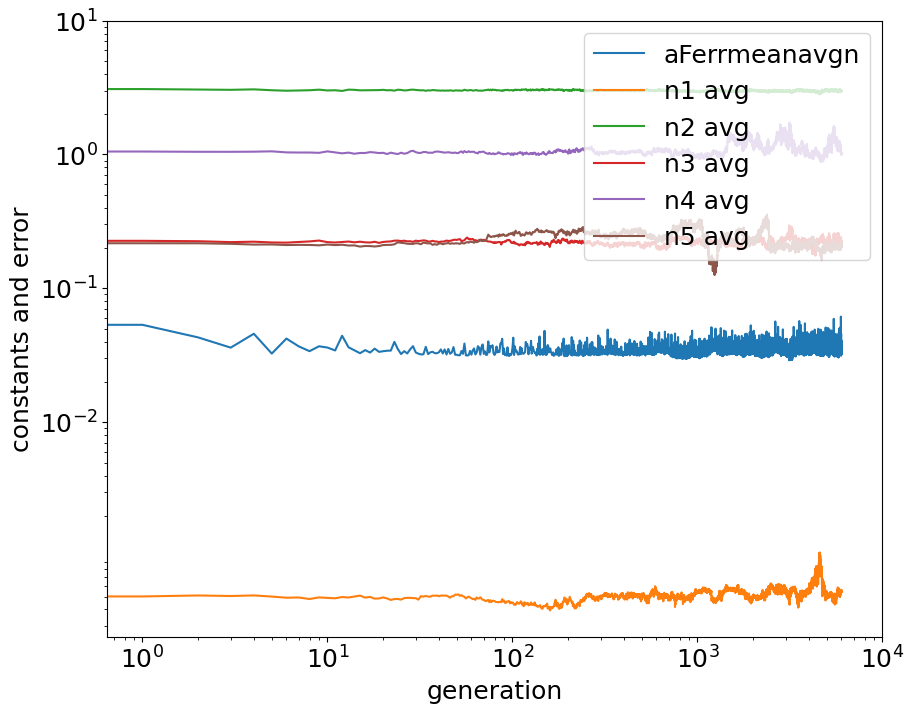

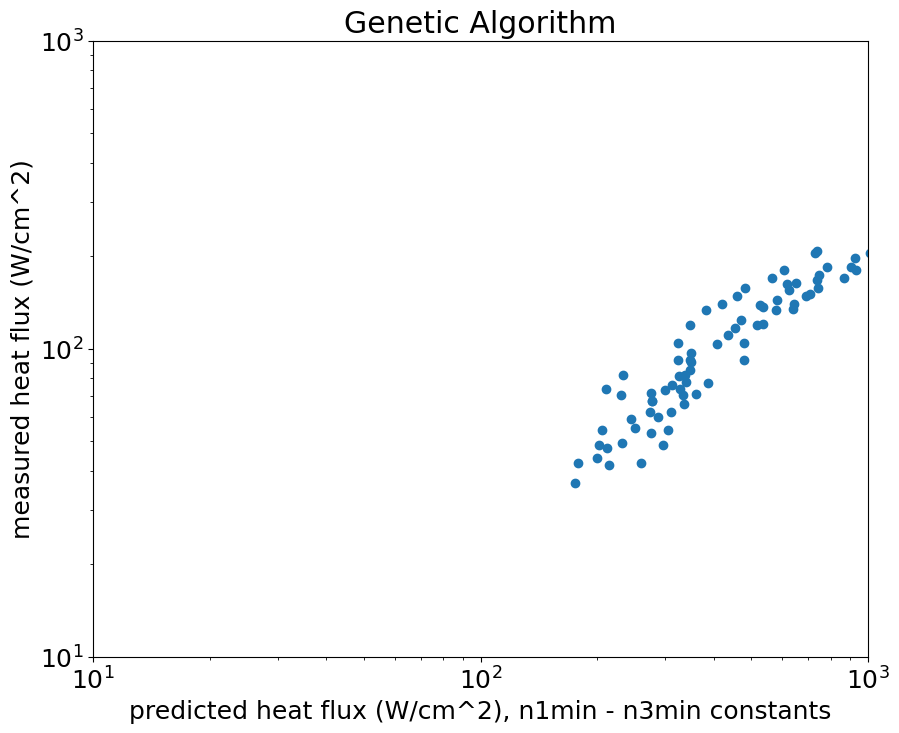

In [5]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 6000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
'''guesses for initial solution population'''
n0i =  -1.0 
n1i = 0.000467
n2i = 3.028
n3i = 0.2249
n4i = 1.054
n5i = 0.217


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr =  [[0.0]]  
#population average solution error and absoute error
Ferravgn =  [[0.0]]
aFerr =  [[0.0]]
aFerravgn =  [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0 
# these store the  n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0

'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
for k in range(NGEN):
    
    '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
    number of data points ND so for each generation, each solution can be compared to a different 
    data point and all the data is compared in each generation.  The order of the solutions in the array 
    that holds the solution constants is constantly changing due to mating and selection, so the pairing 
    is random.'''
    
    
    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is 
    used to evaluate fitness.'''
    
    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    '''CALCULATING ERROR (FITNESS)'''
    for i in range(ND):
        
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1] + n[i][3]*math.log(ydata[i][2] + n[i][4]*9.8*ydata[i][3]) + n[i][5]*lydata[i][4]
        # Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
           
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
    #-------------
    aFerrmean = numpy.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
    aFerrmedian = numpy.median(aFerr) #median error for population for this generation

    '''SELECTION'''
    #pick survivors 
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0
    
    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS):  # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep  
    
    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = numpy.random.randint(low=0, high=nkeep+1)
        nmate2 = numpy.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        if (numpy.random.rand() < 0.5):
           ntemp[nkeep+j+1][0] = n[nmate1][0]  
        else:
           ntemp[nkeep+j+1][0] = n[nmate2][0]
      
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-numpy.random.rand()))  # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-numpy.random.rand()))
    
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-numpy.random.rand()))  # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-numpy.random.rand()))
    
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-numpy.random.rand()))
         
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-numpy.random.rand()))
                
        if (numpy.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-numpy.random.rand()))
        
    #=============================================
    n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
    
    
    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
    # at this generation k
    #=============================================
    #initialize average n's to zero and sum contribution of each member of the solution population 
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):    
        n1avg[k] = n1avg[k] + n[j][1]/NS; 
        n2avg[k] = n2avg[k] + n[j][2]/NS; 
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;

    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # 
    #=============================================
    ''' CALCULATING MEAN ERROR FOR POPULATION'''
    for i in range(ND): 
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] + n4avg[k]*9.8*ydata[i][3]) + n5avg[k]*lydata[i][4] 
            
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = numpy.mean(aFerravgn)
    
    
    # next, update time average of n valaues in population (n1ta[k], etc.) 
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)
    
    # compare aFerrmeanavgn[k] to previous minimum value and save 
    # it and corresponding n(i) values if the value for this generation k is lower 
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k] 
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]
    
    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    
    
# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n5,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], n5avg[k], aFerrmeanavgn[k])
print('MINUMUM:  avg n1-n5,aFerrmeanMin:', n1min, n2min, n3min, n4min, n5min, aFerrmeanavgnMin)
print('TIME AVG:    avg n1-n5,aFerrmean:', n1ta, n2ta, n3ta, n4ta, n5ta, aFerrta)

#SETTING UP PLOTS

#========
#initialize values
qpppred =  [[0.0]]
qppdata =  [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])   
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2] + n4min*9.8*ydata[i][3])**n3min) * ydata[i][4]
    qppdata[i] = ydata[i][0] 
    
#========

# constants evolution plots
# x axis values are generation number 
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points  

plt.rcParams.update({'font.size': 18})

# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn) 
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.plot(gen, n4avg)
plt.plot(gen, n5avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis 
plt.xlabel('generation') 
# naming the y axis 
plt.ylabel('constants and error') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000]) 
plt.show() 


'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)

plt.show()
    
# end CodeP1.2F23 





In [6]:
qppdata = numpy.array(qppdata)
qpppred = numpy.array(qpppred)
qpp_df = pd.DataFrame({'qppdata':qppdata, 'qpppred': qpppred})
qpp_df

,qppdata,qpppred
0,44.1,199.425897
1,47.4,212.361170
2,49.4,231.784189
3,59.2,243.982758
4,67.8,276.318086
...,...,...
72,103.3,407.601980
73,117.0,452.486695
74,138.6,527.464720
75,161.7,617.800994


In [7]:
n1 = 0.0003217195071041581 
n2 = 2.936680714265606
n3 = 0.2480267261317787 
n4 = 1.3233629888026566
n5 = 0.5519472596539943

In [8]:
#converting ydata into a dataframe for easier usage
cols = ["Heat Flux (W/cm^2)", "Superheat (ºC)", "Gravitational Acceleration (ms^-2)", "Surface Tension Parameter","System Pressure (kPa)"]
ydataDf = pd.DataFrame(ydata, columns=cols)
ydataDf

,Heat Flux (W/cm^2),Superheat (ºC),Gravitational Acceleration (ms^-2),Surface Tension Parameter,System Pressure (kPa)
0,44.1,32.5,0.098,1.79,5.5
1,47.4,33.2,0.098,1.79,5.5
2,49.4,34.2,0.098,1.79,5.5
3,59.2,34.8,0.098,1.79,5.5
4,67.8,36.3,0.098,1.79,5.5
...,...,...,...,...,...
72,103.3,41.6,0.098,1.71,5.5
73,117.0,43.1,0.098,1.71,5.5
74,138.6,45.4,0.098,1.71,5.5
75,161.7,47.9,0.098,1.71,5.5


In [9]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [10]:
n1 = 0.0003217195071041581 
n2 = 2.936680714265606
n3 = 0.2480267261317787 
n4 = 1.3233629888026566
n5 = 0.5519472596539943
P = 10 #pressure in kPa

/Users/shawnchan/opt/anaconda3/envs/MECENG249/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


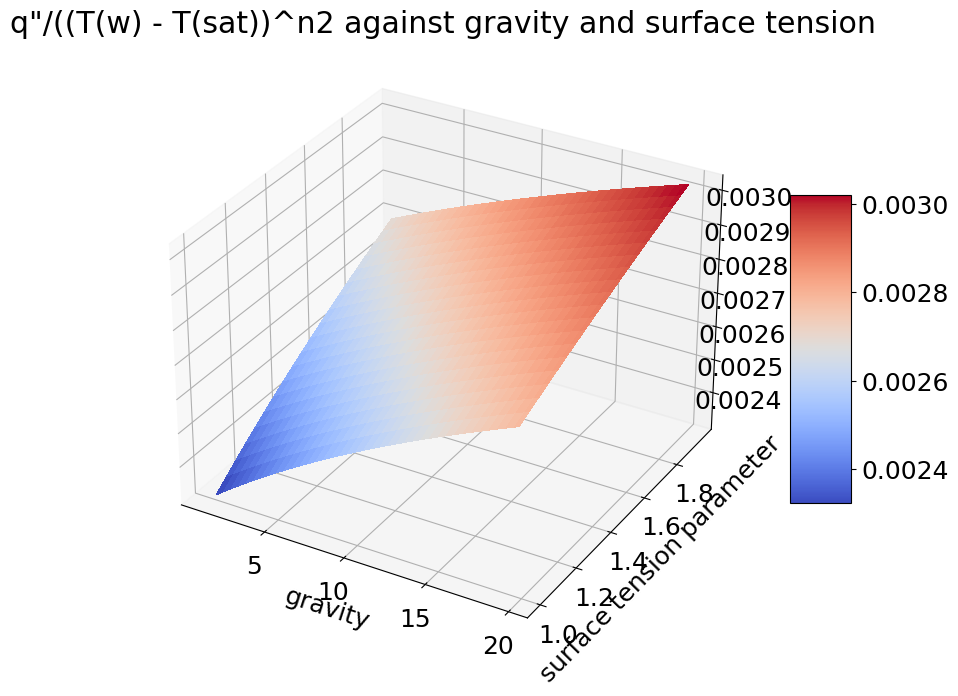

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = numpy.arange(1,20,0.25) #g
Y = numpy.arange(1,2,0.05) #gamma
X, Y = numpy.meshgrid(X,Y)
Z = n1 * ((X + n4 ** 9.81 * Y) ** n3) * (P ** n5)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('gravity')
plt.ylabel('surface tension parameter')
plt.title('q"/((T(w) - T(sat))^n2 against gravity and surface tension')
plt.show()
